# <font color='blue'>Data Science Academy - Python Fundamentos - Capítulo 9</font>

## Download: http://github.com/dsacademybr

## Mini-Projeto 2 - Análise Exploratória em Conjunto de Dados do Kaggle

## Análise 1

In [1]:
# Imports
import os
import subprocess
import stat
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from datetime import datetime
sns.set(style = "white")
%matplotlib inline

In [2]:
# Dataset
clean_data_path = "dataset/autos.csv"
df = pd.read_csv(clean_data_path,encoding = "latin-1")

In [3]:
df.head()

,dateCrawled,name,seller,offerType,price,abtest,vehicleType,yearOfRegistration,gearbox,powerPS,...,postalCode,lastSeen,yearOfCreation,yearCrawled,monthOfCreation,monthCrawled,NoOfDaysOnline,NoOfHrsOnline,yearsOld,monthsOld
0,2016-03-24 11:52:17,Golf_3_1.6,privat,Offer,480,test,Other,1993,manuell,0,...,70435,2016-04-07 03:16:57,2016,2016,March,March,14,3,23,11
1,2016-03-23 10:58:45,A5_Sportback_2.7_Tdi,privat,Offer,18300,test,coupe,2011,manuell,190,...,66954,2016-04-07 01:46:50,2016,2016,March,March,14,1,5,7
2,2016-03-14 12:52:21,"Jeep_Grand_Cherokee_""Overland""",privat,Offer,9800,test,suv,2004,automatik,163,...,90480,2016-04-04 12:47:46,2016,2016,March,March,22,12,12,4
3,2016-03-17 16:54:04,GOLF_4_1_4__3TÃRER,privat,Offer,1500,test,kleinwagen,2001,manuell,75,...,91074,2016-03-17 17:40:17,2016,2016,March,March,0,17,15,5
4,2016-03-31 17:25:20,Skoda_Fabia_1.4_TDI_PD_Classic,privat,Offer,3600,test,kleinwagen,2008,manuell,69,...,60437,2016-04-06 10:17:21,2016,2016,March,March,6,10,8,5


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 313687 entries, 0 to 313686
Data columns (total 27 columns):
 #   Column               Non-Null Count   Dtype 
---  ------               --------------   ----- 
 0   dateCrawled          313687 non-null  object
 1   name                 313687 non-null  object
 2   seller               313687 non-null  object
 3   offerType            313687 non-null  object
 4   price                313687 non-null  int64 
 5   abtest               313687 non-null  object
 6   vehicleType          313687 non-null  object
 7   yearOfRegistration   313687 non-null  int64 
 8   gearbox              313687 non-null  object
 9   powerPS              313687 non-null  int64 
 10  model                313687 non-null  object
 11  kilometer            313687 non-null  int64 
 12  monthOfRegistration  313687 non-null  object
 13  fuelType             313498 non-null  object
 14  brand                313687 non-null  object
 15  notRepairedDamage    313687 non-nu

In [5]:
df.describe(include=[object])

,dateCrawled,name,seller,offerType,abtest,vehicleType,gearbox,model,monthOfRegistration,fuelType,brand,notRepairedDamage,dateCreated,lastSeen,monthOfCreation,monthCrawled
count,313687,313687,313687,313687,313687,313687,313687,313687,313687,313498,313687,313687,313687,313687,313687,313687
unique,247765,195740,2,2,2,9,3,251,11,7,40,3,104,166070,10,2
top,2016-03-24 14:49:47,BMW_318i,privat,Offer,test,limousine,manuell,golf,Jan,Gasoline,volkswagen,No,2016-04-03 00:00:00,2016-04-06 04:15:59,March,March
freq,7,615,313684,313677,162677,84077,239363,25383,52704,196056,66980,217792,12049,16,262928,262949


In [6]:
df.describe(include=[np.number])

,price,yearOfRegistration,powerPS,kilometer,postalCode,yearOfCreation,yearCrawled,NoOfDaysOnline,NoOfHrsOnline,yearsOld,monthsOld
count,313687.000000,313687.000000,313687.000000,313687.000000,313687.000000,313687.000000,313687.0,313687.000000,313687.000000,313687.000000,313687.000000
mean,3902.961863,2001.909231,109.564250,131435.778340,50349.563597,2015.999930,2016.0,8.543274,11.834207,14.090769,6.235187
std,4168.150636,6.803211,191.741685,34963.149957,25765.545682,0.008374,0.0,8.511917,6.504730,6.803211,3.454766
min,0.000000,1910.000000,0.000000,5000.000000,1067.000000,2015.000000,2016.0,0.000000,0.000000,0.000000,1.000000
25%,999.000000,1998.000000,68.000000,125000.000000,29640.000000,2016.000000,2016.0,2.000000,7.000000,10.000000,3.000000
50%,2490.000000,2002.000000,104.000000,150000.000000,49205.000000,2016.000000,2016.0,6.000000,12.000000,14.000000,6.000000
75%,5400.000000,2006.000000,140.000000,150000.000000,70794.000000,2016.000000,2016.0,13.000000,17.000000,18.000000,9.000000
max,28800.000000,2016.000000,20000.000000,150000.000000,99998.000000,2016.000000,2016.0,384.000000,23.000000,106.000000,11.000000


## Distribuição de Veículos com base no Ano de Registro

Text(0.5, 1.02, 'Proporção de Carros por Ano de Registro')

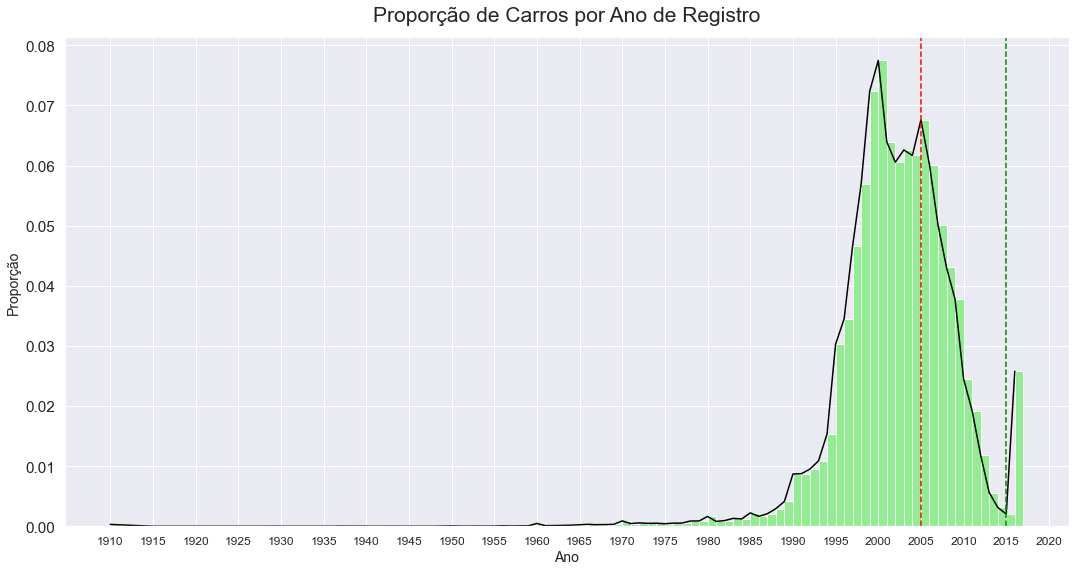

In [7]:
# Crie um Plot com a Distribuição de Veículos com base no Ano de Registro
dist_ano= df.groupby("yearOfRegistration")["yearOfRegistration"].size().reset_index(name='quantidade')
dist_ano['proporcao'] = dist_ano['quantidade']/ dist_ano['quantidade'].sum()

fig = plt.figure(figsize=(18, 9))
sns.set(font_scale=1.4)

plt.plot(dist_ano.yearOfRegistration, dist_ano.proporcao, color='black')
plt.bar(dist_ano.yearOfRegistration, dist_ano.proporcao, color='lightgreen', width = 1, align='edge')

plt.axvline(x=2005, Color="red", linestyle="dashed")
plt.axvline(x=2015, Color="green", linestyle="dashed")

plt.xlabel("Ano", fontsize = 14)
plt.xticks(np.arange(dist_ano.yearOfRegistration.min(), dist_ano.yearOfRegistration.max() + 5, 5.0), fontsize = 12)

plt.ylabel("Proporção", fontsize = 14)
plt.yticks(fontsize = 12)

plt.title("Proporção de Carros por Ano de Registro",fontsize=21 ,y=1.02)

In [8]:
# Salvando o plot
fig.savefig("plots/Analise1/vehicle-distribution.png")

## Variação da faixa de preço pelo tipo de veículo

In [9]:
df.vehicleType.value_counts().index

Index(['limousine', 'kleinwagen', 'kombi', 'bus', 'cabrio', 'Other', 'coupe',
       'suv', 'andere'],
      dtype='object')

(array([-5000.,     0.,  5000., 10000., 15000., 20000., 25000., 30000.,
        35000.]),
 <a list of 9 Text major ticklabel objects>)

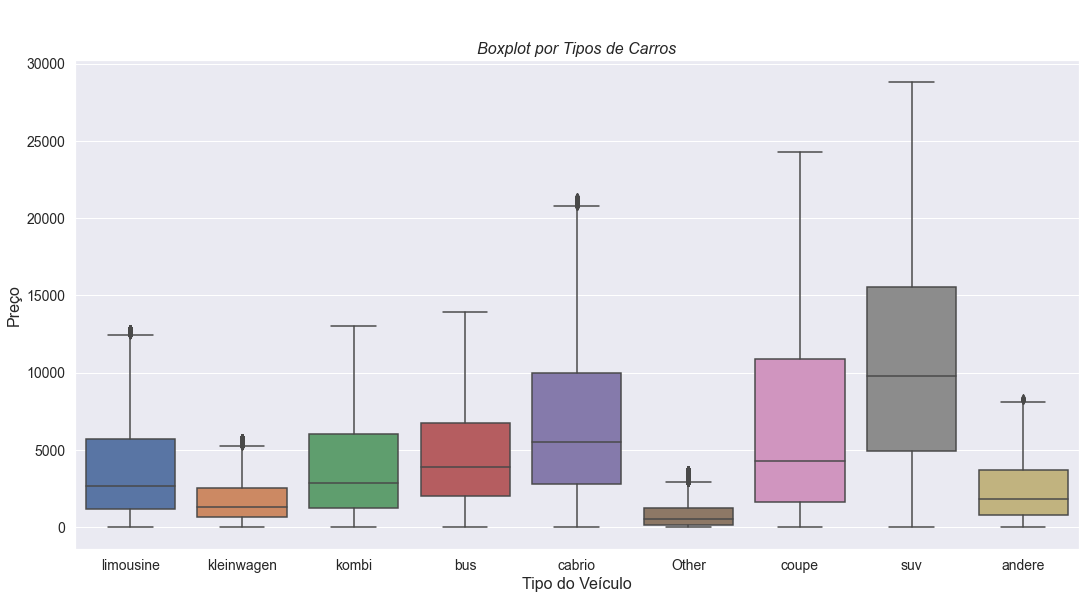

In [10]:
# Crie um Boxplot para avaliar os outliers
fig = plt.figure(figsize=(18, 9))
sns.set(font_scale=1.4)

sns.boxplot(x = 'vehicleType', y='price', 
            data=df, order=['limousine', 'kleinwagen', 'kombi',
                            'bus', 'cabrio', 'Other', 'coupe','suv', 'andere'])

plt.title('\n\nBoxplot por Tipos de Carros', fontsize = 16, style='italic')

plt.xlabel('Tipo do Veículo', fontsize = 16) 

plt.ylabel('Preço', fontsize = 16) 

plt.xticks(fontsize = 14)

plt.yticks(fontsize = 14)

In [11]:
# Salvando o plot
fig.savefig("plots/Analise1/price-vehicleType-boxplot.png")

## Contagem total de veículos à venda conforme o tipo de veículo

Text(0.5, 1.02, 'Quantidade de Veículos por Tipo')

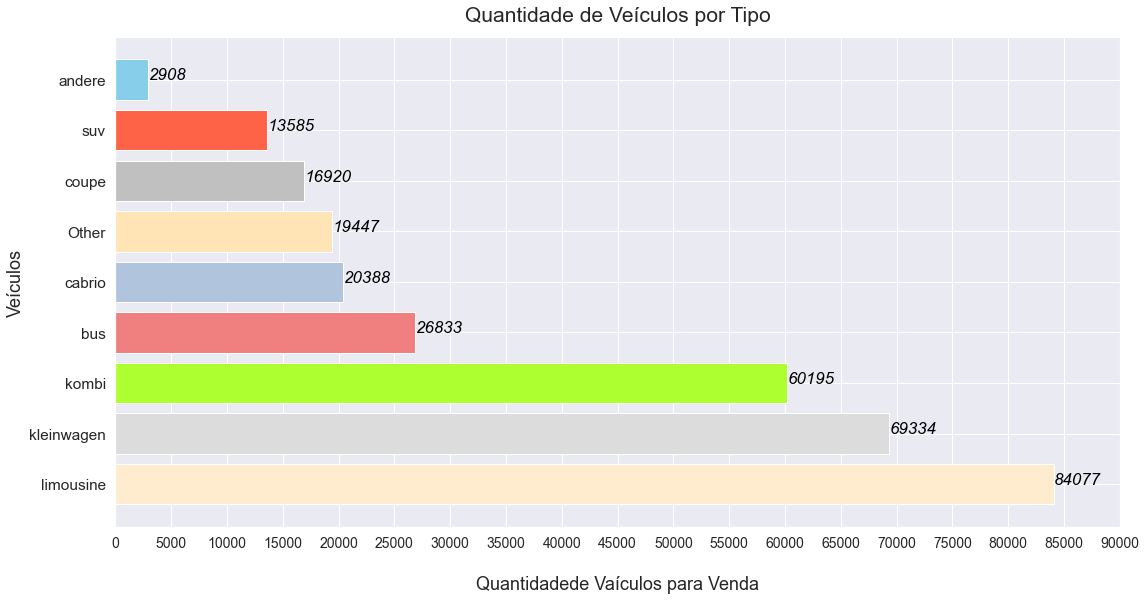

In [39]:
# Crie um Count Plot que mostre o número de veículos pertencentes a cada categoria 
contagem_veiculos = df.vehicleType.value_counts().reset_index(name='quantidade')
contagem_veiculos.rename(columns={'index': 'vehicleType',
                                  'quantidade': 'quantidade'}, inplace=True)

fig, ax = plt.subplots(figsize=(18, 9))
sns.set(font_scale=1.4)
colors = ['blanchedalmond', 'gainsboro', 'greenyellow', 'lightcoral',
          'lightsteelblue', 'moccasin', 'silver','tomato', 'skyblue']

plt.barh(contagem_veiculos.vehicleType, contagem_veiculos.quantidade,color=colors )

for i, v in enumerate(list(contagem_veiculos.quantidade)):
    ax.text(v + 3, i, str(v), color='black', fontstyle='italic')

plt.xlabel("\nQuantidadede Vaículos para Venda", fontsize = 18)
plt.xticks(np.arange(0, contagem_veiculos.quantidade.max() + 10000, 5000),
           fontsize = 14)

plt.ylabel("Veículos", fontsize = 18)
plt.xticks(fontsize = 14)

plt.title("Quantidade de Veículos por Tipo",fontsize=21 ,y=1.02)


In [41]:
# Salvando o plot
fig.savefig("plots/Analise1/count-vehicleType.png")

Conheça a Formação Cientista de Dados, um programa completo, 100% online e 100% em português, com 340 horas, mais de 1.200 aulas em vídeos e 26 projetos, que vão ajudá-lo a se tornar um dos profissionais mais cobiçados do mercado de análise de dados. Clique no link abaixo, faça sua inscrição, comece hoje mesmo e aumente sua empregabilidade:

https://www.datascienceacademy.com.br/pages/formacao-cientista-de-dados

# Fim

### Obrigado - Data Science Academy - <a href="http://facebook.com/dsacademybr">facebook.com/dsacademybr</a>